# Model cards

In [2]:
import fairbench as fb

In [3]:
test, y, scores = fb.tabular.adult(predict="probabilities")
yhat = scores>0.5

In [4]:
test.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [5]:
scores

array([0.00634647, 0.12528998, 0.41812446, ..., 0.71564329, 0.13546642,
       0.80749264])

In [6]:
sensitive = fb.Fork(fb.categories@test[8], fb.categories@test[9]).intersectional()
sensitive

Female,[0 0 0 ... 0 0 0]
Male,[1 1 1 ... 1 1 1]
Asian-Pac-Islander,[0 0 0 ... 0 1 0]
Asian-Pac-Islander&Female,[0 0 0 ... 0 0 0]
Asian-Pac-Islander&Male,[0 0 0 ... 0 1 0]
Black,[1 0 0 ... 0 0 0]
Black&Female,[0 0 0 ... 0 0 0]
Black&Male,[1 0 0 ... 0 0 0]
White,[0 1 1 ... 1 0 1]
White&Female,[0 0 0 ... 0 0 0]
White&Male,[0 1 1 ... 1 0 1]


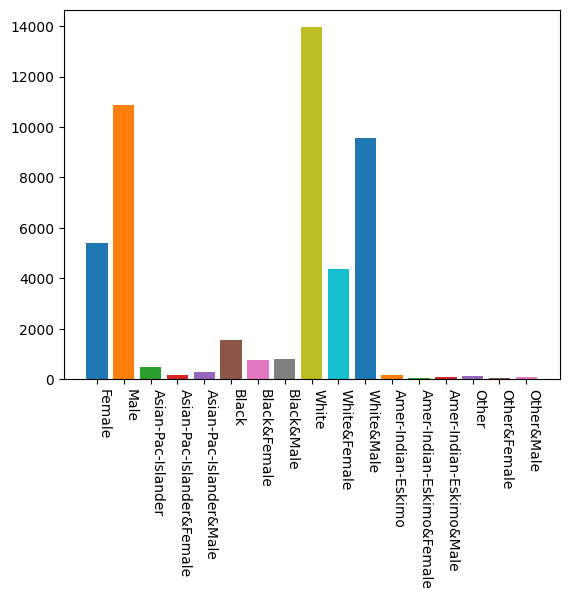

In [7]:
fb.visualize(sensitive.sum())

In [8]:
fb.reduce(fb.accuracy(predictions=yhat, labels=y, sensitive=sensitive), fb.min)

min,0.777


In [9]:
report = fb.multireport(predictions=yhat, scores=scores, labels=y, sensitive=sensitive)
report

accuracy,0.777
pr,0.000
tpr,0.000
tnr,0.832
auc,0.853
avgscore,0.055
tophr,0.333
toprec,0.001
avghr,0.111
avgrepr,0.000
accuracy,0.834


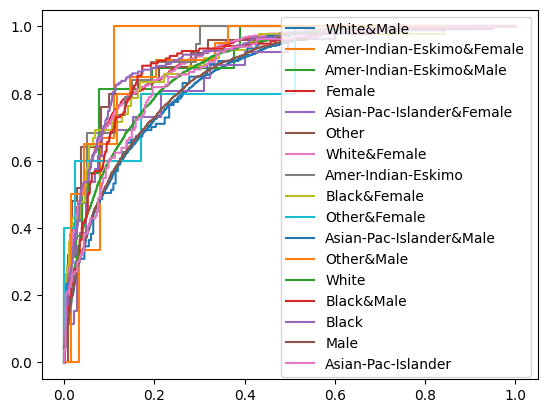

In [10]:
fb.visualize(report.auc.maxbarea.explain.explain.curve)

In [12]:
report.tpr.explain.maxdiff.explain.true_positives

White&Male,1758.0
Amer-Indian-Eskimo&Female,0.0
Amer-Indian-Eskimo&Male,5.0
Female,195.0
Asian-Pac-Islander&Female,9.0
Other,4.0
White&Female,170.0
Amer-Indian-Eskimo,5.0
Black&Female,15.0
Other&Female,1.0
Asian-Pac-Islander&Male,72.0


In [13]:
fb.stamps.available()

('four_fifths',
 'accuracy',
 'prule',
 'dfpr',
 'dfnr',
 'auc',
 'abroca',
 'rbroca',
 'maxbdcg')

In [14]:
stamps = fb.combine(fb.stamps.abroca(report), fb.stamps.four_fifths(report))
stamps

abroca,0.156
4/5 rule,False


In [15]:
import IPython
html_page = fb.modelcards.tohtml(stamps, show=False)
IPython.display.HTML(html_page)

Metric,Value
abroca,0.156
4/5 rule,❌
